In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [90]:
#Ok hay que hacer - Set de datos
#1) Realizar un análisis estadístico básico del conjunto de datos, como calcular las estadísticas descriptivas (media, mediana, desviación estándar, etc.) 
#y la correlación entre las diferentes características.

#2) Visualizar los datos mediante gráficos para comprender mejor la relación entre las diferentes características y la calidad del vino.
#Por ejemplo, se pueden crear gráficos de dispersión para visualizar la relación entre cada característica y la calidad del vino.

#3) Realizar una limpieza de datos básica para tratar los valores perdidos y 
#los datos atípicos, que pueden afectar la precisión del modelo de regresión.

#4) Dividir el conjunto de datos en conjuntos de entrenamiento y prueba para entrenar el modelo de regresión lineal y evaluar su precisión.



fixed acidity           0.671703
volatile acidity       -0.552496
citric acid             1.000000
residual sugar          0.143577
chlorides               0.203823
free sulfur dioxide    -0.060978
total sulfur dioxide    0.035533
density                 0.364947
pH                     -0.541904
sulphates               0.312770
alcohol                 0.109903
quality                 0.226373
Name: citric acid, dtype: float64


<Axes: >

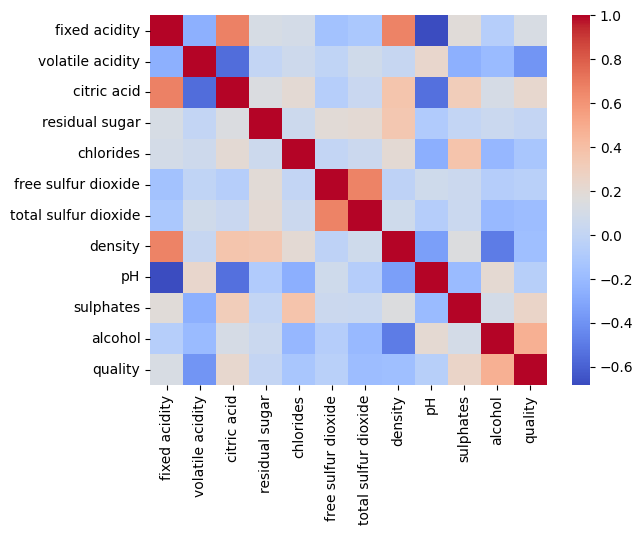

In [91]:
# Cargar el conjunto de datos en un marco de datos
df = pd.read_csv("WineDataSet/winequality-red.csv")

# Calcular la matriz de correlación
corr = df.corr()

# Calcular la correlación entre cada variable y la calidad del vino
corrFA = df.corr()['fixed acidity']
corrVA = df.corr()['volatile acidity']
corrCA = df.corr()['citric acid']
corrRS = df.corr()['residual sugar']
corrC = df.corr()['chlorides']
corrFSD = df.corr()['free sulfur dioxide']
corrTSD = df.corr()['total sulfur dioxide']
corrD = df.corr()['density']
corrPH = df.corr()['pH']
corrS = df.corr()['sulphates']
corrA = df.corr()['alcohol']
corrQ = df.corr()['quality']

# Imprimir la correlación de cada variable con todas las demás variables
#print(corrCA)

# Graficar la matriz de correlación utilizando un mapa de calor
sns.heatmap(corr, cmap='coolwarm')

In [109]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Cargar el conjunto de datos
data= pd.read_csv("WineDataSet/winequality-red.csv")

# Eliminar valores atípicos
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
data = data[~((data < (q1 - 1.5 * iqr)) | (data > (q3 + 1.5 * iqr))).any(axis=1)]

# Imputar valores faltantes
imputer = SimpleImputer(strategy="median")
imputed_data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Normalizar las variables de entrada
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(imputed_data.iloc[:, :-1]), columns=imputed_data.columns[:-1])

# Agregar la variable de salida
normalized_data["quality"] = imputed_data["quality"]

# Guardar los datos normalizados en un nuevo archivo CSV
#normalized_data.to_csv("WineDataSet/winequality-red-normalized.csv", index=False)

print(normalized_data.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.319444          0.655367     0.000000        0.291667   0.448718   
1       0.375000          0.858757     0.000000        0.583333   0.730769   
2       0.375000          0.723164     0.054795        0.458333   0.653846   
3       0.847222          0.180791     0.767123        0.291667   0.435897   
4       0.319444          0.655367     0.000000        0.291667   0.448718   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.243902              0.241379  0.629630  0.770270   0.353846   
1             0.585366              0.525862  0.513889  0.351351   0.538462   
2             0.341463              0.413793  0.537037  0.432432   0.492308   
3             0.390244              0.465517  0.652778  0.297297   0.384615   
4             0.243902              0.241379  0.629630  0.770270   0.353846   

    alcohol  quality  
0  0.148936      5.0  
1  0.23404

In [103]:
class LinearRegression:
    
    def __init__(self, n_features):
        self.W = np.random.normal(-1,1,(n_features,1)) #weights
        self.b = np.random.rand(1) #intercept
        
    def descent(self, delta_W, delta_b, learning_rate):
        #updating the weights with the calculated gradients
        self.W -= learning_rate*delta_W                                                                  
        self.b -= learning_rate*delta_b 
        
    def derivatives(self, X, Y):
        #partial derivative of cost w.r.t the weights
        delta_W = np.sum(np.multiply(((np.matmul(X,self.W)+self.b)-Y), X))*2/X.shape[0] 
        #partial derivative of cost w.r.t the intercept
        delta_b = np.sum(((np.matmul(X,self.W)+self.b)-Y))*2/X.shape[0]                
        return delta_W, delta_b
    
    #fit
    def train(self, X, Y, epochs=100, learning_rate=0.2):
        X = np.array(X).reshape(-1,1)
        Y = np.array(Y).reshape(-1,1)
        for i in range(epochs):
            delta_W, delta_b = self.derivatives(X, Y)
            self.descent(delta_W, delta_b, learning_rate)
        return self.W, self.b
    def predict(self, X):
        #print(X.shape, X.reshape(-1,1).shape)
        product = np.matmul(np.array(X).reshape(-1,1),self.W)+self.b
        return product


R2 Score: 0.3659665167420558


R-cuadrado del modelo en el conjunto de prueba: 0.42
